# Modelling

## Notebook Summary


Linear Model Implementation

## Notebook Setup

In [107]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


# Loading sklearn functionality
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, f_regression
from sklearn.pipeline import make_pipeline

# Set global random seed for reproducibility
random_seed_val = 42
np.random.seed(random_seed_val)

## Data Loading & Understanding

In [108]:
# Creating DataFrame
pp_house_df = pd.read_csv("london_house_price_data_pp.csv")
# Viewing DataFrame
pp_house_df.head(5)

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice,history_price,tenure_Feudal,tenure_Freehold,...,propertyType_Mid Terrace House,propertyType_Mid Terrace Property,propertyType_Purpose Built Flat,propertyType_Semi-Detached Bungalow,propertyType_Semi-Detached House,propertyType_Semi-Detached Property,propertyType_Terrace Property,propertyType_Terraced,propertyType_Terraced Bungalow,currentEnergyRating_encoded
0,51.495505,-0.132379,2.0,2.0,71.0,1.0,759000.0,249950,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,51.478185,-0.092201,1.0,1.0,64.0,1.0,388000.0,32000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,51.588774,-0.139599,1.0,4.0,137.0,2.0,1261000.0,133000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,51.466089,0.006967,1.0,2.0,97.0,1.0,944000.0,128500,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,51.451327,-0.007569,1.0,3.0,135.0,2.0,726000.0,75000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0


In [109]:
# Columns and data types
pp_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265911 entries, 0 to 265910
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   latitude                             265911 non-null  float64
 1   longitude                            265911 non-null  float64
 2   bathrooms                            265911 non-null  float64
 3   bedrooms                             265911 non-null  float64
 4   floorAreaSqM                         265911 non-null  float64
 5   livingRooms                          265911 non-null  float64
 6   saleEstimate_currentPrice            265911 non-null  float64
 7   history_price                        265911 non-null  int64  
 8   tenure_Feudal                        265911 non-null  float64
 9   tenure_Freehold                      265911 non-null  float64
 10  tenure_Leasehold                     265911 non-null  float64
 11  tenure_Shared

In [110]:
# Shape of the DataFrame
pp_house_df.shape

(265911, 32)

## Preparing Data

In [111]:
# Seperating features from target
X = pp_house_df.drop('saleEstimate_currentPrice', axis=1)
y = pp_house_df['saleEstimate_currentPrice']

In [112]:
# Remainder test split
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed_val)

# Train validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_remainder, y_remainder, test_size=0.20, random_state=random_seed_val)

# Checking size of split
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_valid)}") 
print(f"Test set size: {len(X_test)}")

Training set size: 170182
Validation set size: 42546
Test set size: 53183


## Linear Modelling

Implementation of predicitive models which assume that only linear relationships exist between the target and the features.

### Linear Regression 

The performance of this simple linear model will be used as a baseline for future linear models for comparison. Default hyperparameters used, no tuning required.

In [113]:
# Defining model
lin_reg_model = LinearRegression()

# Fitting model
lin_reg_model.fit(X_train, y_train)

# Scoring on train
train_score = lin_reg_model.score(X_train, y_train)

# Scoring on validation
valid_score = lin_reg_model.score(X_valid, y_valid)

# Print performance
print(f"The R^2 value for the training set is {train_score} and the R^2 value for the validation set is {valid_score}")


The R^2 value for the training set is 0.7404895370629878 and the R^2 value for the validation set is 0.7254400486265812


**Model Performance**

The close alignment between the training and validation R^2 scores suggests that the model generalizes effectively to unseen data without overfitting. The R^2 values indicate that the model explains around 74% of the variance in the target variable, the model captures a significant portion of the underlying patterns in the data. 

In [114]:
# Coefficients
lin_reg_model.coef_

# Coefficient and Feature DataFrame
coeff_df = pd.DataFrame(lin_reg_model.coef_, index=X_train.columns, columns = ["coeffeicent"] )

# Reset index to turn the index into a column
coeff_df.reset_index(inplace=True)

# Rename columns appropriately
coeff_df.columns = ['Feature', 'Coefficient']

# Display DataFrame
print(coeff_df)

                                Feature    Coefficient
0                              latitude  -77284.354152
1                             longitude -964545.531122
2                             bathrooms  183294.003060
3                              bedrooms  -95235.818285
4                          floorAreaSqM    7935.101099
5                           livingRooms   42299.976594
6                         history_price       0.349616
7                         tenure_Feudal   32229.066267
8                       tenure_Freehold -198898.527433
9                      tenure_Leasehold   14429.177622
10                        tenure_Shared  152240.283805
11       propertyType_Bungalow Property   29668.457867
12          propertyType_Converted Flat -129411.734558
13       propertyType_Detached Bungalow  -42511.675132
14          propertyType_Detached House   13739.428985
15       propertyType_Detached Property -132754.492073
16    propertyType_End Terrace Bungalow   85676.828067
17       p

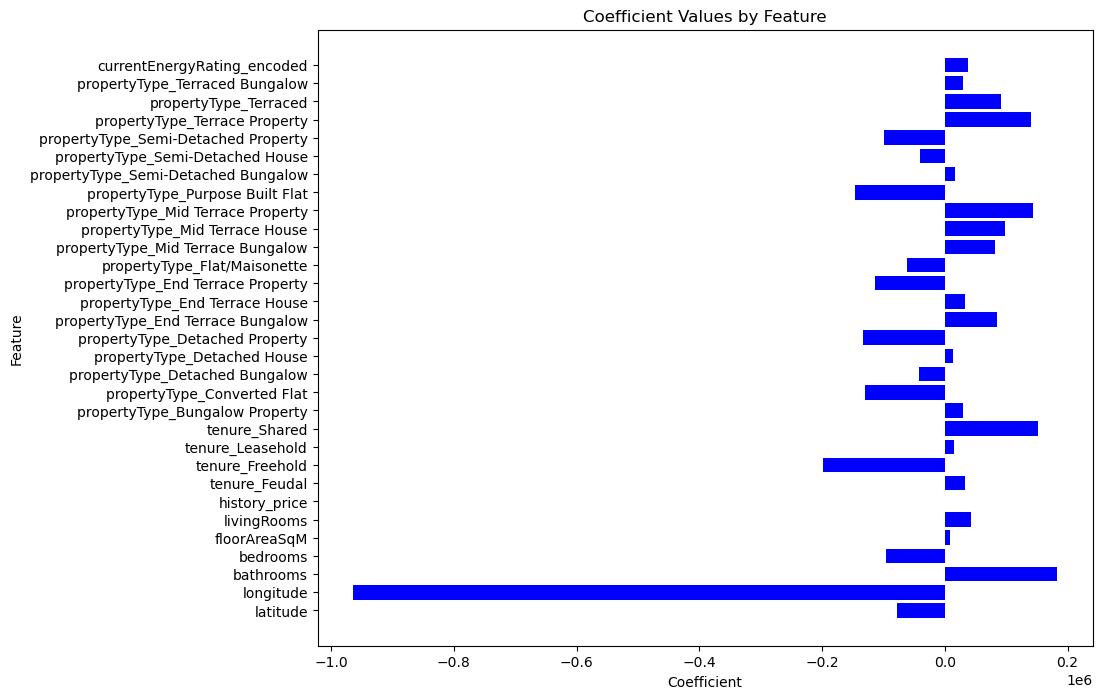

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 8))  
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='blue')  
plt.xlabel('Coefficient') 
plt.ylabel('Feature')  
plt.title('Coefficient Values by Feature')  
plt.show()  


**Interpretation of Coefficients**

**LOCATION**

- *Latitude:* Negative coefficient suggests properties further north are less expensive.

- *Longitude:* Strong negative coefficient indicates properties further east are significantly cheaper, possibly highlighting the desirability of western regions.

Location strongly influences prices, but the abnormally large magnitude of longitude may indicate scaling issues or outliers.

**PROPERTY CHARACTERISTICS**

- *Bathrooms:* Positive coefficient; more bathrooms increase price.

- *Bedrooms:* Negative coefficient (counterintuitive); may indicate multicollinearity or data issues.

- *Floor Area (floorAreaSqM):* Positive coefficient; larger properties are more expensive.

- *Living Rooms:* Positive coefficient; more living rooms increase price.

Most features align with expectations, but the negative bedrooms coefficient is unusual and warrants investigation.

**PRICE HISTORY**

- *History Price:* Very small coefficient; historical prices have minimal impact on current prices.

- *Takeaway:* Past prices are not a strong predictor of current property values.

**TENURE TYPE**

- *Freehold:* Strong negative coefficient (counterintuitive); contradicts typical real estate trends.

- *Shared Ownership:* Positive coefficient; shared ownership properties are more expensive.

The negative Freehold coefficient is unexpected and may indicate data issues or confounding factors.

**PROPERTY TYPE** 

- *Purpose Built Flat:* Strong negative coefficient; these properties are significantly cheaper.

- *Mid Terrace Property:* Strong positive coefficient; these properties are more expensive.

- *Semi-Detached House:* Negative coefficient; contradicts typical market trends.

Property type has mixed effects, with some coefficients aligning with expectations and others showing anomalies.

**ENERGY RATING** 

- *Current Energy Rating:* Positive coefficient; higher energy ratings increase property prices.

Energy efficiency is valued in the market, aligning with sustainability trends.

**Key Insights**

The model mostly captures expected trends but shows anomalies such as bedrooms, Freehold, Semi-Detached House, Purpose Built Flat. 

More bedrooms typically elevate property prices however, the model unexpectedly indicates the opposite. Generally, freehold properties command higher values compared to leasehold or feudal ones but the alternative is suggested by a strong negative coefficient. Semi-detached houses are also unexpectedly associated with a negative coefficient, when they are usually priced above terraced homes or flats. Although flats tend to be more affordable, the size of the coefficient associated with them is unusually large.Additionally, the extremely large negative coefficient for longitude indicates an unusually high influence

These anomalous results may stem from multicollinearity, data quality issues, or model limitations. Further refinement, such as scaling or regularization must be performed to improve accuracy and interpretability.




## Ridge Regression
Ridge regression is essential for handling anomalies, it will handle multicollinearity and stabilize coefficients. The model will be implemented with varying alpha values to examine which value of alpha provides optimal performance.

In [116]:
# Make copy of data before scaling
X_train_ridge = X_train.copy()
X_valid_ridge = X_valid.copy()

# Define alpha values
alpha_values = [0, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
ridge_train_score = []
ridge_valid_score = []

for alpha in alpha_values:
    # Create a pipeline with scaling and Ridge regression
    ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=alpha))

    # Fit model on training data
    ridge_model.fit(X_train_ridge, y_train)

    # Score model on training and validation data
    train_score_val = ridge_model.score(X_train_ridge, y_train)
    valid_score_val = ridge_model.score(X_valid_ridge, y_valid)

    # Store scores
    ridge_train_score.append(train_score_val)
    ridge_valid_score.append(valid_score_val)

c:\Users\sanja\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning:

Ill-conditioned matrix (rcond=5.8659e-17): result may not be accurate.



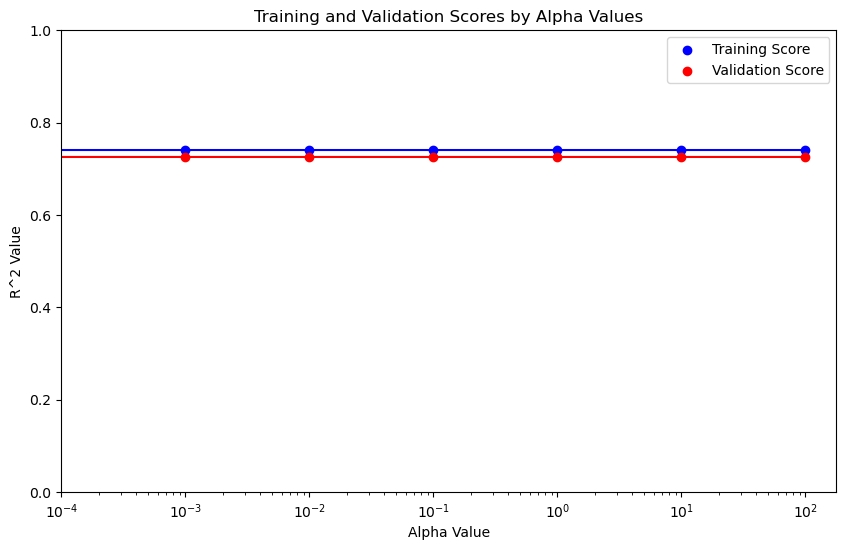

In [117]:
# Plotting scores against alpha

# Creating scatter plot with two lines
plt.figure(figsize=(10, 6))
plt.scatter(alpha_values, ridge_train_score, color='blue', label='Training Score')
plt.scatter(alpha_values, ridge_valid_score, color='red', label='Validation Score')
plt.plot(alpha_values, ridge_train_score, color='blue')
plt.plot(alpha_values, ridge_valid_score, color='red')

# Logarithmic scale for the x-axis
plt.xscale('log')

# Set x-axis and y-axis limits
plt.xlim(left=1e-4) 
plt.ylim(bottom=0, top=1.0)

# Labels and Title
plt.xlabel('Alpha Value')
plt.ylabel('R^2 Value')
plt.title('Training and Validation Scores by Alpha Values')
plt.legend()

# Show plot
plt.show()



**Training and Validation Score Plot Observations**

Both the training and validation scores remain almost constant across all tested alpha values. The R^2 values for both are consistently around 0.740 and 0.725 for training and validation respectively, indicating a good fit. The values' closeness to 1 indicate that the model explains a large proportion of the variance in the dependent variable. 

There is no discernible gap between the training and validation scores. This closeness suggests that the model is neither overfitting nor underfitting significantly. The plot unfortunately does not show which value of alpha is the optimal value for the model.


In [118]:
# Grid Search

# Define the parameter grid for alpha
param_grid = {'ridge__alpha': [0, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Set up GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')

# Fit GridSearchCV to the training data
grid_search.fit(X_train_ridge, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['ridge__alpha']
print(f"Best alpha value: {best_alpha}")

# Get the best model
best_model = grid_search.best_estimator_

Best alpha value: 10.0


Grid search is implemented here to find the best value of alpha by evaluating all possible combinations in the defined space. Five fold cross validation is used to ensure robust performance evaluation. 

In [119]:
# Testing the best model
best_train_score = best_model.score(X_valid_ridge, y_valid)
best_valid_score = best_model.score(X_valid_ridge, y_valid)
print(f"Test R^2 score with best alpha: {best_train_score:.4f} Validation R^2 score with best alpha: {best_valid_score:.4f}")

Test R^2 score with best alpha: 0.7254 Validation R^2 score with best alpha: 0.7254


In [120]:
# Extract coefficients from the best model
ridge_coefficients = best_model.named_steps['ridge'].coef_

# Create a DataFrame for coefficients
coefficients_df = pd.DataFrame({
    'Feature': X_train_ridge.columns,  # Feature names
    'Coefficient': ridge_coefficients  # Coefficients
})

# Display the DataFrame
print(coefficients_df)

                                Feature    Coefficient
0                              latitude   -4519.793351
1                             longitude  -87244.860385
2                             bathrooms  130522.116800
3                              bedrooms -110617.962160
4                          floorAreaSqM  438719.537072
5                           livingRooms   24245.175256
6                         history_price  272380.222879
7                         tenure_Feudal   11263.238970
8                       tenure_Freehold  -54243.415962
9                      tenure_Leasehold   51320.319083
10                        tenure_Shared    8903.149213
11       propertyType_Bungalow Property    2393.974912
12          propertyType_Converted Flat  -30927.254836
13       propertyType_Detached Bungalow    -215.164670
14          propertyType_Detached House    7770.450341
15       propertyType_Detached Property   -1485.577253
16    propertyType_End Terrace Bungalow    1427.348480
17       p

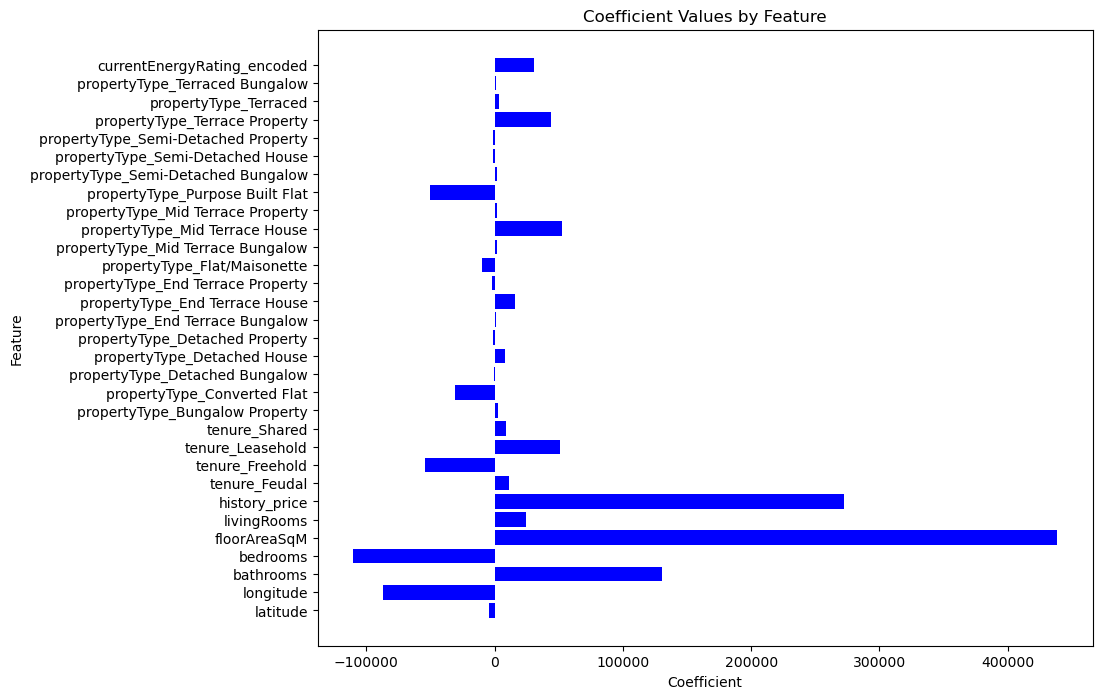

In [ ]:
# Create a bar chart
plt.figure(figsize=(10, 8))  
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='blue')  
plt.xlabel('Coefficient') 
plt.ylabel('Feature')  
plt.title('Coefficient Values by Feature')  
plt.show()  

**Interpretation of coefficients**

Ridge regression has improved the model by reducing the magnitude of coefficients and making them more stable, but it hasn't resolved the underlying anomalies.

The persistent anomalies (e.g., negative coefficients for bedrooms and Freehold) suggest deeper issues like multicollinearity, data quality problems, or the need for more sophisticated feature engineering.

To fully address these issues, further steps like checking for multicollinearity, improving data quality, and exploring feature engineering or nonlinear models are necessary.